# Análisis de datos recopilados en Crankshaft List 



# Tabla de contenidos <a id='back'></a>

* [Introducción](#intro)
    * [Objetivo del análisis](#objetivo)
* [1. Exploración de datos](#exploracion)
    * [Cargar datos](#carga_de_datos)
    * [Explorar datos iniciales](#exploracion_de_datos)
* [2. Pre-procesamiento de datos](#pre_procesamiento)
    * [Tratar valores ausentes](#valores_ausentes)
    * [Corregir tipos de datos](#corregir_datos)
* [3. Transformación de datos](#transform_datos)
    * [Enriquecer datos](#enriq_datos)
    * [Comprobar datos limpios](#comprobar_datos)
* [4. Análisis exploratorio de datos](#eda)
    * [Estudiar parámetros principales](#estudiar_eda)
    * [Estudiar y tratar valores atípicos](#tratar_datos)
    * [Estudiar parámetros principales sin valores atípicos](#estudiar_datos)
    * [Período de colocación de anuncios](#anuncios)
    * [Precio promedio por cada tipo de vehículo](#precio_datos)
    * [Factores de precio](#factores_precio)
* [Conclusiones generales](#end)


# Introducción <a id='intro'></a>

Como analista en Crankshaft List. El proyecto consiste en preparar un informe donde limpiaremos, clasificaremos y analizaremos los datos obtenidos de los cientos de anuncios gratuitos de vehículos que son publicados en el sitio web cada día. 


## Objetivo del análisis <a id='objetivo'></a>

Estudiaremos los datos recopilados durante los últimos años para determinar qué factores influyen en el precio de un vehículo. 

# 1. Exploración de datos <a id='exploracion'></a>

**Descripción de los datos**

El conjunto de datos contiene los siguientes datos:
-	price
-	model_year
-	model
-	condition
-	cylinders
-	fuel — gasolina, diesel, etc.
-	odometer — el millaje del vehículo cuando el anuncio fue publicado
-	transmission
-	paint_color
-	is_4wd — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
-	date_posted — la fecha en la que el anuncio fue publicado
-	days_listed — desde la publicación hasta que se elimina


Abrimos los datos desde nuestro archivo y los examinamos

In [62]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt 

### Cargar datos <a id='carga_de_datos'></a>

Revisamos la información general

In [63]:
# Carga el archivo de datos en un DataFrame

df=pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales <a id='exploracion_de_datos'></a>

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `type`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [64]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [65]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [66]:
# imprimir una muestra de datos
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


Podemos observar que existen valores ausentes en varias columnas. Sin embargo, la que llama más mi atención es la columna de is_4wd la cual contiene 25953 valores ausente, es poco más de la mitad del conjunto total de datos, y solo tenemos dos opciones 1.0 o Nan.

In [67]:
df[df.is_4wd.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [68]:
df[df.model_year.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [69]:
df['odometer'].sort_values().unique()

array([0.0e+00, 1.0e+00, 2.0e+00, ..., 9.8e+05, 9.9e+05,     nan])

In [70]:
df['cylinders'].sort_values().unique()

array([ 3.,  4.,  5.,  6.,  8., 10., 12., nan])

In [71]:
df['price'].sort_values().unique()

array([     1,      3,      5, ..., 189000, 300000, 375000])

Tenemos también columnas con datos fuera de lo común como lo es en la columna price. Algunos valores deberían ser int y no de tipo float, como el año por ejemplo.

In [72]:
df.duplicated().sum()

0

In [73]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusiones y siguientes pasos

Según nuestra exploración de datos tenemos valores ausentes en las siguientes columnas:

- model_year       3619
- cylinders        5260
- odometer         7892
- paint_color      9267
- is_4wd          25953

Tenemos que model_year, cylinders y is_4wd tienen valores decimales. Los valores de is.4wd pueden haber sido malinterpretados debido a que solo tiene dos valore: 1.0 o Nan (Lo que nos hace pensar que probablemente esos valores Nan en realidad son 0 o False) Tenemos también algunos valores inconsistentes en price y en odometer. Algunos de los nombres de los modelos de autos tienen duplicados implícitos que corregir. No tenemos duplicados obvios 

Para los siguientes pasos, vamos a abordar los valores mencionados de las columnas y analizaremos si debemos reemplazarlos o quitarlos, dependiendo si afectan o no a nuestros datos

# 2. Pre-procesamiento de datos <a id='pre_procesamiento'></a>

## Tratar los valores ausentes <a id='valores_ausentes'></a>

Primero abordaremos los valores ausentes de la columna 'is_4wd'. En las instrucciones nos indicaron que estos valores debían ser booleanos (True or False) Por lo que cambiaremos los 1.0=True y los Nan=False

In [74]:
#Reemplazamos los valores correspondientes
df['is_4wd']= df['is_4wd'].astype('bool')

In [75]:
#Comprobamos que hayan cambiado en df
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,True,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28


Por el momento reemplazaremos los valores Nan de la columna paint_color por 'unknown' debido a que no podemos inferir en sus valores.

In [76]:
#reemplazamos valores NaN
df['paint_color']= df['paint_color'].fillna('unknown')

Para los valores Nan de las siguientes columnas procederemos así, crearemos una función que nos de un nuevo df donde las medianas reemplacen los valores NaN dependiendo de los factores significativos:

- Para cylinders utilizaremos como variable model, porque es lo que más se relaciona con el número de cilindros en un auto
- Para model_year utilizaremos como variable de relación model también
- Para odometer utilizaremos model_year como factor para encontrar la mediana


He decidio utilizar la mediana porque me parece que con valores tan significativos, es la mejor opción. Esto nos ayudará a tener un aproximado para completar estos valores ausentes. De igual forma df la tabla original queda sin cambios para un estudio futuro.


In [77]:
#  Escribimos una función que usaremos para completar los valores ausentes
# 1. Agrupamos por la columna que deseamos evaluar y encontramos la mediana, también colocamos índice
# 2. Utilizamos merge para unir esta columna a nuestro dataframe original
# 3. Ahora reemplazamos los valores NaN

def fill_NaN_values_median (data, merge_columns, column_input):
    
    name_column=f'median_{column_input}'
   
    logs=data[[column_input, merge_columns]]
    median_by_group=logs.groupby(merge_columns).median().reset_index()
    median_by_group.rename(columns={column_input:name_column}, inplace=True)

    df_merge=data.merge(median_by_group, on=merge_columns, how='left')
    df_merge.loc[df_merge[column_input].isna(), column_input]=df_merge.loc[df_merge[column_input].isna(), name_column]
    
    df_merge=df_merge.drop([name_column], axis=1)
    
    return df_merge

In [78]:
# Comprobamos si funciona
df_1=fill_NaN_values_median(df,'model','cylinders')
print(df_1.isna().sum())

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


In [79]:
# Aplicamos la función para model_year
df_1=fill_NaN_values_median(df_1,'model', 'model_year')
print(df_1.isna().sum())

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64


In [80]:
# Aplicamos la función para odometer
df_1=fill_NaN_values_median(df_1,'model_year', 'odometer')
print(df_1.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


Hemos completado nuestros valores ausentes CASI en su totalidad, por lo que ahora vamos a corregir algunos de los datos para su estudio y análisis. El único valor Nan que nos queda lo reemplazamos en manualmente ya que no pudo completarse porque lo más probable es que hubo un problema de tipeo en el model_year. Asumiremos que es del año 1992 por lo que aprox tendría hasta el 2018 unos 26 años de uso. Asumiendo que no se usa demasiado pondremos que tiene, 250.000 

In [81]:
# Vemos cual valor falta completar
df_1[df_1.odometer.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,True,2018-11-18,59


In [82]:
# Aplicamos la función para odometer
df_1['odometer']= df_1['odometer'].fillna(250000.0)
print(df_1.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


## Corregir los tipos de datos <a id='corregir_datos'></a>

Ya que los datos están completos ahora, vamos a corregir los tipos de datos

In [83]:
#Recordemos nuestra tabla df_1
df_1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unknown,True,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28


In [84]:
#Cambiemos esos datos float a int(enteros)
df_1['model_year']=df_1['model_year'].astype(int)
df_1['cylinders']=df_1['cylinders'].astype(int)
df_1['odometer']=df_1['odometer'].astype(int)

In [85]:
#Verificamos que se haya cambiado correctamente
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 5.2+ MB


Los valores atípicos no los vamos a cambiar porque más adelante segmentaremos los datos, sin embargo vamos a revisar duplicados implícitos y cambiarlos en caso de que los halla.

In [86]:
# Revisamos duplicados en la columna model
df['model'].sort_values().unique()

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [87]:
# Vamos a crear una función para reemplazar los duplicados implícitos

def replace_wrong_values(wrong_values,correct_value):
    for values in wrong_values:
        df['model']= df['model'].replace(values,correct_value)

In [88]:
# Eliminamos los duplicados implícitos en model
ford=['ford f150','ford f150 supercrew cab xlt']
ford2=['ford f-250 sd','ford f250 super duty','ford f-250 super duty','ford f250']
ford3=['ford focus se']
ford4=['ford f-350 sd', 'ford f350 super duty']

        
ford_1='ford f-150'
ford2_1='ford f-250'
ford3_1='ford focus'
ford4_1='ford f-350'

replace_wrong_values(ford, ford_1)
replace_wrong_values(ford2, ford2_1)
replace_wrong_values(ford3, ford3_1)
replace_wrong_values(ford4, ford4_1)


Debido a que son modelos de autos no podemos encasillar tantos dentro de una sola marca.

# 3. Transformación de datos <a id='transform_datos'></a>

## Enriquecer datos <a id='enriq_datos'></a>

Para tener una tabla más detallada vamos a agregar las siguientes columnas:

- Día de la semana, mes y año en el que el anuncio se colocó
- Los años del vehículo cuando el anuncio se colocó
- La media de millaje del vehículo por año


In [89]:
# Visualizamos la tabla
df_1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,True,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28


In [90]:
# Añadimos las columnas que detallan el día de la semana que el anuncio se colocó, el mes y el año
df_1['date_posted']= pd.to_datetime(df_1['date_posted'], format='%Y-%m-%d')
df_1['weekday']=df_1['date_posted'].dt.weekday
df_1['month']=df_1['date_posted'].dt.month
df_1['year']=df_1['date_posted'].dt.year
df_1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,1,4,2019


In [91]:
# Agregamos los años del vehículo cuando el anuncio se colocó, sumamos +1 para no tener valores 0 que afecten a nuestro promedio
df_1['car_age']=df_1['year']-df_1['model_year']+1
df_1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,8
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,3,2,2019,7
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,1,4,2019,3


In [92]:
# Agrega el millaje promedio del vehículo por año
df_1['odo_mean']=df_1['odometer']/df_1['car_age']
df_1.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age,odo_mean
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019,17,9493.941176
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,1,4,2019,3,26967.666667


En la columna condition, vamos a reemplazar los valores de cadena con una escala numérica:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [93]:
# Vamos a reemplazar los valores de condición con algo que se pueda manipular más fácilmente por medio de una función sencilla

def condition_number (condition):
    
    if condition=='new':
        return 5
    if condition=='like new':
        return 4
    if condition=='excellent':
        return 3
    if condition=='good':
        return 2
    if condition=='fair':
        return 1
    return 0


In [94]:
# Vamos a reemplazar los valores de condición con algo que se pueda manipular más fácilmente por medio de una función sencilla

df_1['condition']=df_1['condition'].apply(condition_number)

## Comprobar datos limpios <a id='comprobar_datos'></a>

Dado que los datos están listos para el análisis, damos un vistazo rápido a nuestro conjunto de datos

In [95]:
# imprime la información general/resumida sobre el DataFrame

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  weekday       51525 non-null  int64         
 14  month         51525 non-null  int64         
 15  year          51525 non-null  int64 

In [96]:
# imprimir una muestra de datos
df_1.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age,odo_mean
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019,17,9493.941176
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,1,4,2019,3,26967.666667


# 4. Análisis exploratorio de datos <a id='eda'></a>

## Estudiar parámetros principales <a id='estudiar_eda'></a>

Ahora vamos a estudiar los párametros de principal interés para analizar los valores atípicos de nuestro conjunto de datos

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

[[<AxesSubplot:title={'center':'price'}>]]


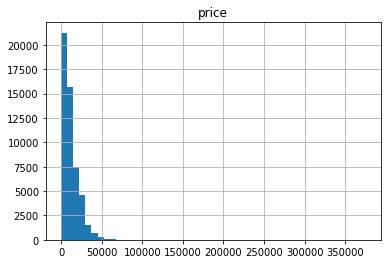

[[<AxesSubplot:title={'center':'car_age'}>]]


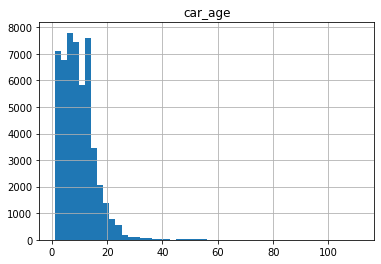

[[<AxesSubplot:title={'center':'odometer'}>]]


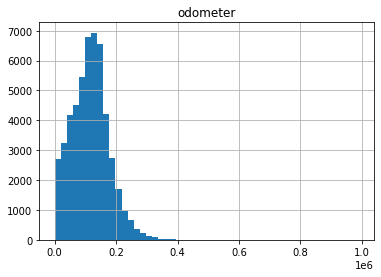

[[<AxesSubplot:title={'center':'cylinders'}>]]


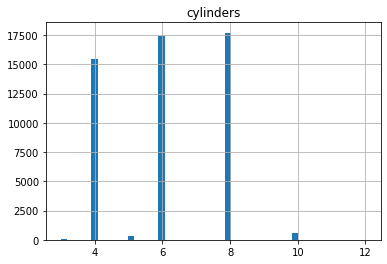

[[<AxesSubplot:title={'center':'condition'}>]]


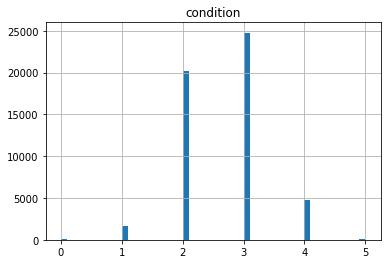

In [97]:
#Vamos a trazar histogramas para cada uno de los parámetros
for name in ['price','car_age','odometer','cylinders','condition']: 
    print(df_1.hist(name, bins=50))
    plt.show()

En nuestro histograma price: Vemos que nuestro pico máximo esta por debajo de los 10000 y que hay algunos valores atípicos exhuberantes en cuanto a precio, además algunos valores en 0. 

Para car_age no está nada mal tener algunos datos cerca de 0 debido a que representa a que los autos no tienen muchos años hasta el momento de la publicación, por otro lado que tengan más de 30, 40, 50 años si lo es!

Para el millaje si tenemos valores cercanos a 0, sin embargo aún falta hacer una correlación entre edad del auto y millaje, para determinar los valores atípicos. Lo veremos más adelante para estar seguros de que valores son los necesarios

En el histograma cylinders, podemos destacar que usualmente los coches tienen de 3 a 12 cilindros, por el momento no vemos valores atípicos por aquí. 

En el histograma de condition vemos muy pocos valores cerca de 0 y 1 así que no necesariamente existen valores atípicos.

<AxesSubplot:xlabel='car_age', ylabel='odometer'>

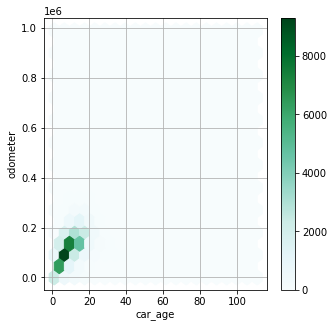

In [98]:
#Trazamos un histograma combinado para ver la correlación entre car_age y odometer
df_1.plot(x='car_age', y='odometer', kind='hexbin', gridsize=20, figsize=(5,5), sharex=False, grid=True) 


In [99]:
print(df_1['car_age'].corr(df_1['odometer']))

0.4868283196219952


Esta correlación entre car_age y odometer no es muy alta, es decir que no demuestra una gran conexión en estas dos variables. Quizá se deba a los valores atípicos por lo que más adelante revisaremos y compararemos.

<AxesSubplot:xlabel='price', ylabel='condition'>

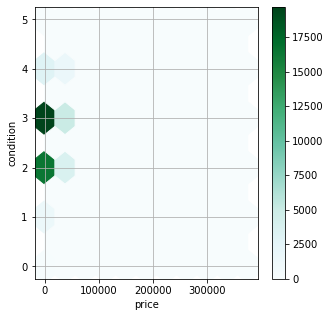

In [100]:
#Trazamos un histograma combinado para ver la correlación entre price y condition
df_1.plot(x='price', y='condition', kind='hexbin', gridsize=10, figsize=(5,5), sharex=False, grid=True) 


In [101]:
print(df_1['price'].corr(df_1['condition']))

0.22151805102843367


El gráfico no nos da mucha información, pero vemos que la mayoría de autos se encuentran agrupados en un precio dentro de la media y no hay una correlación fuerte en que el precio aumente si el auto posee mejores condiciones, quizá tenga que ver más con el modelo de auto

## Estudiar y tratar valores atípicos <a id='tratar_datos'></a>

Con los histogramas que trazamos identificamos que columnas podrían tener valores atípicos. Primero identificaremos los límites superiores e inferiores para el rango normal y separaremos en un nuevo dataframe sin valores atipicos para luego compararlo con nuestro dataframe original.

In [102]:
# Creamos una función para observar los valores atípicos de las columnas en df_1

def boxplot_atypical_values(column, data):
    
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR= Q3-Q1
    plt.ylim=(-100,1000)
    data.boxplot(column)
    plt.hlines(xmin=0.1, xmax=1 ,y=[Q3+1.5*IQR], color='red')
    plt.title("Valores atípicos de {}".format(column))
    y=[Q3+1.5*IQR]
    print(f'El límite superior es {y}')
    plt.show()
    print(data[column].describe())
    

El límite superior es [25.0]


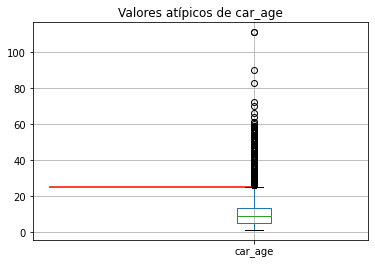

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64


In [103]:
# Aplicamos la función a car_age para observar los valores atípicos.
boxplot_atypical_values('car_age', df_1)

Podemos observar que los valores atípicos de car_age están alrededor de los 22 años, nos ayudamos de un describe() para interpretar mejor los resultados. Ahora podemos segmentar y filtrar a los que no excedan de los 22 años.

El límite superior es [34597.5]


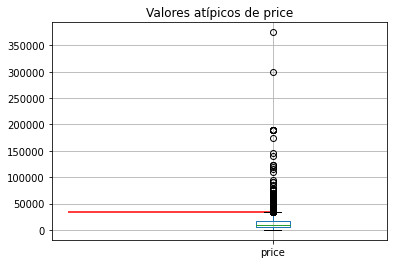

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64


In [104]:
# Aplicamos la función a price para observar valores atípicos
boxplot_atypical_values('price', df_1)

Nos ayudamos del describe para interpretar mejor los datos, los valores atípicos superan 40000 aproximadamente vamos a escoger ese rango de referencia

El límite superior es [271905.0]


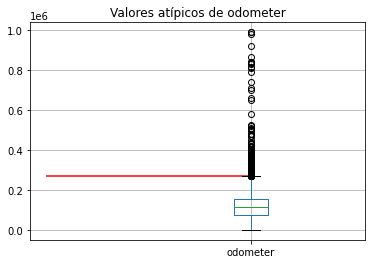

count     51525.000000
mean     115202.311810
std       62085.445337
min           0.000000
25%       73500.000000
50%      114076.000000
75%      152862.000000
max      990000.000000
Name: odometer, dtype: float64


In [105]:
# Por último aplicamos la función a odometer
boxplot_atypical_values('odometer', df_1)

Así mismo observamos con ayuda del describe, que nuestros valores atípicos están por encima del 280000 aproximadamente

Ahora vamos a filtrar en un nuevo dataframe nuestros datos sin valores atípicos

In [106]:
# Filtramos los datos obtenidos del límite superior
df_2=df_1.query('car_age<=25' and 'price<34597' and 'odometer<271905')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50880 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50880 non-null  int64         
 1   model_year    50880 non-null  int64         
 2   model         50880 non-null  object        
 3   condition     50880 non-null  int64         
 4   cylinders     50880 non-null  int64         
 5   fuel          50880 non-null  object        
 6   odometer      50880 non-null  int64         
 7   transmission  50880 non-null  object        
 8   type          50880 non-null  object        
 9   paint_color   50880 non-null  object        
 10  is_4wd        50880 non-null  bool          
 11  date_posted   50880 non-null  datetime64[ns]
 12  days_listed   50880 non-null  int64         
 13  weekday       50880 non-null  int64         
 14  month         50880 non-null  int64         
 15  year          50880 non-null  int64 

Hemos filtrado nuestro df_1, se han eliminado 529 datos lo que no representa una gran pérdida.

## Estudiar parámetros principales sin valores atípicos <a id='estudiar_datos'></a>

Vamos a estudiar nuestras columnas sin valores atípicos significativos.

[[<AxesSubplot:title={'center':'price'}>]]


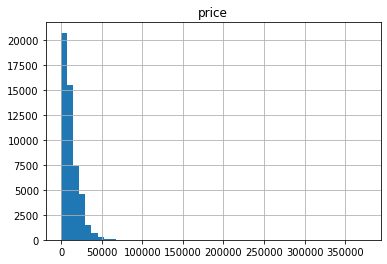

[[<AxesSubplot:title={'center':'car_age'}>]]


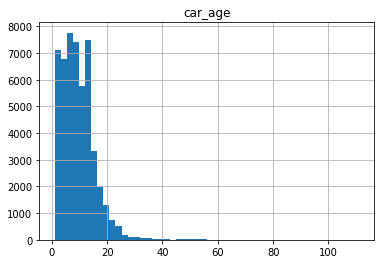

[[<AxesSubplot:title={'center':'odometer'}>]]


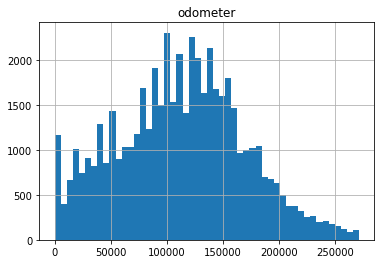

In [107]:
#Graficamos el histograma de las variables estudiadas

for name in ['price','car_age','odometer']: 
    print(df_2.hist(name, bins=50))
    plt.show()

Ahora vemos nuestros histogramas más congruentes sin valores atípicos.

## Periodo de colocación de los anuncios <a id='anuncios'></a>
Vamos a estudiar cúantos días los anuncios fueron mostrados (`days_listed`). Vamos a encontrar la media y la mediana según el modelo

In [108]:
#Utilizamos model como variablee para estudiar los días
df_2.pivot_table(index='model', values='days_listed', aggfunc=['median', 'mean'])

,median,mean
,days_listed,days_listed
model,,
acura tl,34.5,40.320513
bmw x5,34.0,42.419476
buick enclave,33.0,39.206642
cadillac escalade,34.0,41.869565
chevrolet camaro,33.0,39.055556
...,...,...
toyota sienna,33.0,39.168712
toyota tacoma,34.0,38.904348


El período de colocación habitual ronda los 65 días. Ahora debemos determinar que anuncios se ha eliminado rápidamente  y cuándo son publicados por un tiempo anormalmente largo, visualizaremos la información en un histograma.

In [109]:
#Vamos a calcular un porcentaje para determinar los modelos de autos que han estado menos de 10 días o se han eliminado más rápido
df_2['too_fast']=df_2['days_listed']<10
too_fast_stat=df_2.pivot_table(index='model', values='too_fast')
too_fast_stat.head()

/tmp/ipykernel_27/1226043014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['too_fast']=df_2['days_listed']<10


,too_fast
model,
acura tl,0.059829
bmw x5,0.082397
buick enclave,0.107011
cadillac escalade,0.074534
chevrolet camaro,0.084541


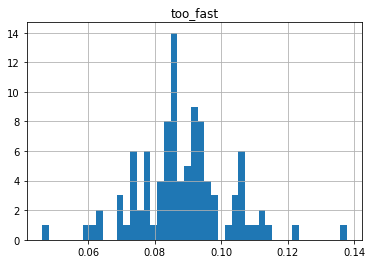

In [110]:
too_fast_stat.hist(bins=45)
plt.show()

El gráfico alcanza un máximo entre el 0.8 y 0.1 lo que significa que aprox el 9%  de los anuncios duran menos de 10 días en la página de anuncios. En general poco menos del 14% entra en esta categoría

In [111]:
#Vamos a calcular un porcentaje para determinar los modelos de autos que han estado más de 65 días anunciados
df_2['too_slow']=df_2['days_listed']>65
too_slow_stat=df_2.pivot_table(index='model', values='too_slow')
too_slow_stat.head()

/tmp/ipykernel_27/4015505723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['too_slow']=df_2['days_listed']>65


,too_slow
model,
acura tl,0.183761
bmw x5,0.187266
buick enclave,0.162362
cadillac escalade,0.173913
chevrolet camaro,0.149758


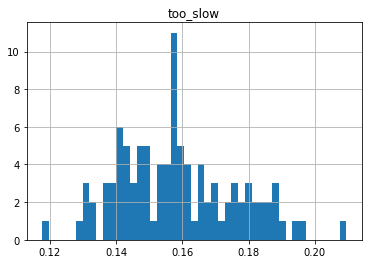

In [112]:
too_slow_stat.hist(bins=45)
plt.show()

El gráfico alcanza un máximo entre el 0.14 lo que significa que aprox el 14%  de los anuncios duran más de 65 días en la página de anuncios. En general poco más del 20% entra en esta categoría

## Precio promedio por cada tipo de vehículo <a id='precio_datos'></a>

Vamos a analizar el número de anuncios y el precio promedio de cada tipo de vehículo.

In [113]:
#Vamos a encontrar el promedio y el número de anuncios según el tipo de vehículo con doble función, lo almacenamos para poder graficarlo después
mean_price=df_2.pivot_table(index='type', values='price', aggfunc=['mean','count'])
print(mean_price)

                     mean  count
                    price  price
type                            
SUV          11197.112662  12320
bus          17135.666667     24
convertible  14474.029213    445
coupe        14423.964598   2288
hatchback     6910.633107   1033
mini-van      8236.545613   1151
offroad      14453.796209    211
other        11040.996047    253
pickup       16280.272741   6827
sedan         6988.099661  12081
truck        16913.775436  12099
van          10589.069841    630
wagon         9177.276021   1518


In [114]:
#reenombramos las columnas
mean_price.columns=['mean','count']
print(mean_price)

                     mean  count
type                            
SUV          11197.112662  12320
bus          17135.666667     24
convertible  14474.029213    445
coupe        14423.964598   2288
hatchback     6910.633107   1033
mini-van      8236.545613   1151
offroad      14453.796209    211
other        11040.996047    253
pickup       16280.272741   6827
sedan         6988.099661  12081
truck        16913.775436  12099
van          10589.069841    630
wagon         9177.276021   1518


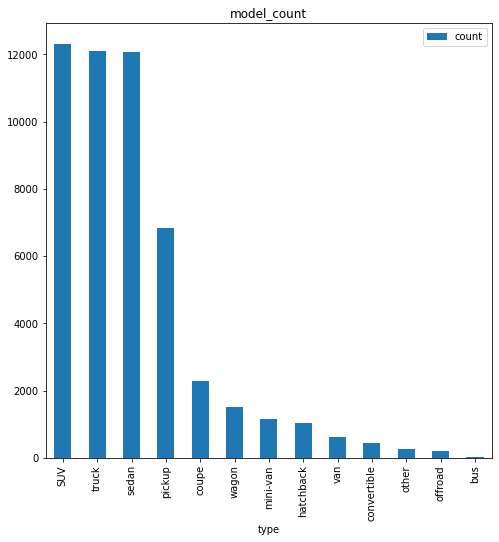

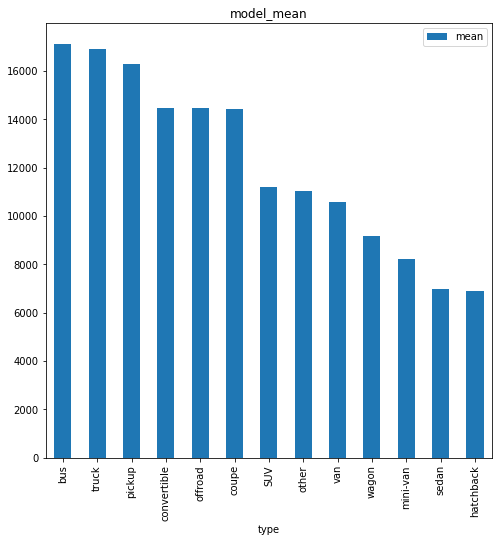

In [115]:
#Para una mejor visualización vamos a representarlo gráficamente 
mean_price.sort_values(by='count', ascending=False).plot(y='count',kind='bar', title='model_count', figsize=(8,8))
mean_price.sort_values(by='mean', ascending=False).plot(y='mean',kind='bar', title='model_mean', figsize=(8,8))
plt.show()

El gráfico nos muestra los autos que han aparecido mayormente en la pagína de anuncios. En primer lugar tenemos a los SUV y en segundo a truck que les ha ganado por muy poco a los sedan

## Factores de precio <a id='factores_precio'></a>

Nos falta analizar que factores impactan más sobre el precio. Tomaremos los tipos más populares de vehículos y veremos si depende de la edad del coche, millaje, condición, tipo de transmisión o color.

Para las variables categóricas (tipo de transmisión y color) trazaremos gráficos de caja y bigotes, para los demás haremos gráficos de dispersión. 

In [116]:
#Utilizaremos los types de las variables categóricas que contengan a SUV y truck unicamente
#Vamos a agrupar por precio y color de pintura por medio del promedio
df_3=df_2.query('type==("SUV", "truck")')
paint_analysis=df_3[['paint_color', 'price']]
paint_analysis_1=paint_analysis.groupby('paint_color').mean()
paint_analysis_1

,price
paint_color,
black,15818.947606
blue,12043.013584
brown,10640.299501
custom,12067.094771
green,9676.186876
grey,14161.587847
orange,14092.053435
purple,7537.037037
red,12745.556414


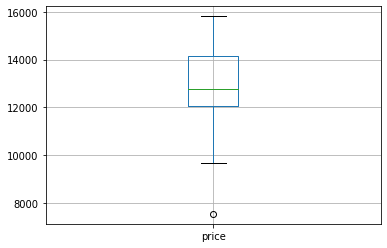

In [117]:
#Vamos a graficarlo por medio de un diagrama de caja de bigote
paint_analysis_1.boxplot()
plt.show()

Observamos una gran cantidad de datos que se encuentran entre los 10000 y 15000, lo que indica que no hay realmente valores atípicos que relacionen el color del auto con un mayor precio. En este casi el blanco, negro y amarillo destacan sin embargo la mayoría se encuentran dentro de un rango considerable.

In [118]:
#Realizaremos el mismo procedimiento para transmisión ya con nuestro df_3 filtrado que contiene sólo los datos de SUV y truck
#Vamos a agrupar por precio y tipo de transmisión por medio del promedio
trans_analysis=df_3[['transmission', 'price']]
trans_analysis_1=trans_analysis.groupby('transmission').mean()
trans_analysis_1

,price
transmission,
automatic,14232.685619
manual,11309.045405
other,8070.428962


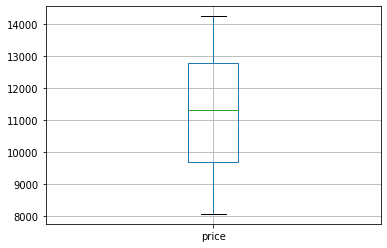

In [119]:
#Vamos a graficarlo por medio de un diagrama de caja de bigote
trans_analysis_1.boxplot()
plt.show()

Un gran porcentaje de personas no específicó si prefieren entre manual o automático, sin embargo lo que si podemos denotar es que en general se prefieren los automáticos por sobre los manuales

Para los valores cuantitativos utilizaremos matriz de correlación con diagramas de dispersión

              price   car_age  condition  odometer
price      1.000000 -0.519167   0.253310 -0.468230
car_age   -0.519167  1.000000  -0.325914  0.574184
condition  0.253310 -0.325914   1.000000 -0.323859
odometer  -0.468230  0.574184  -0.323859  1.000000


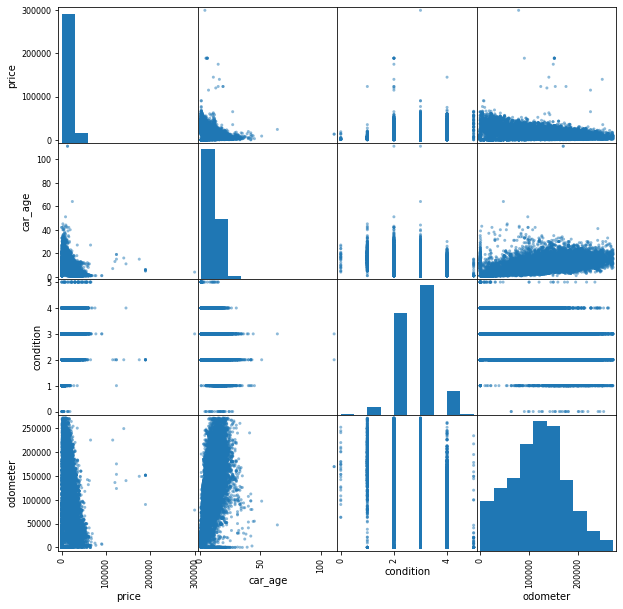

In [120]:
#Definimos nuestra matriz de correlación
print(df_3[['price','car_age','condition','odometer']].corr())
pd.plotting.scatter_matrix(df_3[['price','car_age','condition','odometer']], figsize=(10,10))
plt.show()

En relación con la variable precio podemos ver una pequeña correlación con car_age y odometer.

## Conclusión general <a id='end'></a>

Nuestro objetivo como analista en Crankshaft List. era preparar un informe donde limpiaramos, clasifiquemos y analicemos los datos obtenidos de los cientos de anuncios gratuitos de vehículos que son publicados en el sitio web cada día.

Con los datos recopilados determinaremos qué factores influyen en el precio de un vehículo.

Paso 1. Exploración de datos y preprocesamiento de datos
Se identificaron los valores ausentes en algunas columnas. Sin embargo, la que llama más mi atención es la columna is_4wd la cual contiene 25953 valores ausentes, es poco más de la mitad del conjunto total de datos y solo tenemos dos opciones 1.0 o Nan.
Tenemos también columnas con datos fuera de lo común como en la columna price. Algunos valores deberían ser int y no de tipo float, como el año por ejemplo.

Según nuestra exploración de datos tenemos valores ausentes en las siguientes columnas:

- model_year       3619
- cylinders        5260
- odometer         7892
- paint_color      9267
- is_4wd          25953

Tenemos que model_year, cylinders y is_4wd tienen valores decimales. Los valores de is.4wd pueden haber sido malinterpretados debido a que solo tiene dos valore: 1.0 o Nan (Lo que nos hace pensar que probablemente esos valores Nan en realidad son 0 o False) Tenemos también algunos valores inconsistentes en price y en odometer. Algunos de los nombres de los modelos de autos tienen duplicados implícitos que corregir. No tenemos duplicados obvios 

Paso 2. Transformación de datos

No se eliminó ningún dato por el momento, se rellenaron los valores ausentes de acuerdo con valores significativos para no sesgar nuestro análisis futuro.

Primero cambiamos los valores ausentes de la columna 'is_4wd'. En las instrucciones nos indicaron que estos valores debían ser booleanos (True or False) Por lo que cambiaremos los 1.0=True y los Nan=False

Por el momento reemplazaremos los valores Nan de la columna paint_color por 'unknown' debido a que no podemos inferir en sus valores.

Para los valores Nan de las siguientes columnas procederemos se creó una función nos de un nuevo df donde las medianas reemplacen los valores NaN dependiendo de los factores significativos:

- Para cylinders utilizaremos como variable model, porque es lo que más se relaciona con el número de cilindros en un auto
- Para model_year utilizaremos como variable de relación model también
- Para odometer utilizaremos model_year como factor para encontrar la mediana


He decidido utilizar la mediana porque me parece que con valores tan atípicos, es la mejor opción. Esto nos ayudará a tener un aproximado para completar estos valores ausentes. De igual forma df la tabla original queda sin cambios para un estudio futuro.
El único valor Nan que nos queda lo reemplazamos en manualmente ya que no pudo completarse porque lo más probable es que hubo un problema de tipeo en el model_year. Asumiremos que es del año 1992 por lo que aprox tendría hasta el 2018 unos 26 años de uso. Asumiendo que no se usa demasiado pondremos que tiene, 250.000


Paso 3. Transformación de datos
Ya que los datos están completos ahora, vamos a corregir los tipos de datos
Cambiemos esos datos float a int(enteros)
Los valores atípicos no los vamos a cambiar porque más adelante segmentaremos los datos. Aquí eliminamos con una función los duplicados implícitos. Sin embargo, debido a que son modelos de autos no podemos encasillar tantos dentro de una sola marca.

Para tener una tabla más detallada se agregaron las siguientes columnas:

- Día de la semana, mes y año en el que el anuncio se colocó
- Los años del vehículo cuando el anuncio se colocó
- La media de millaje del vehículo por año

En la columna condition, se reemplazaron los valores de cadena con una escala numérica:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

Paso 4. Análisis exploratorio de datos
Los principales parámetros que consideramos aquí fueron: 
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado
Por medio de histogramas identificamos cuales de estos parámetros tienen valores atípicos:

- En nuestro histograma price: Vemos que nuestro pico máximo esta por debajo de los 10000 y que hay algunos valores atípicos exhuberantes en cuanto a precio, además algunos valores en 0.
- Para car_age no está nada mal tener algunos datos cerca de 0 debido a que representa a que los autos no tienen muchos años hasta el momento de la publicación, por otro lado que tengan más de 30, 40, 50 años si lo es!
- Para el millaje si tenemos valores cercanos a 0, sin embargo aún falta hacer una correlación entre edad del auto y millaje, para determinar los valores atípicos. Lo veremos más adelante para estar seguros de que valores son los necesarios
- En el histograma cylinders, podemos destacar que usualmente los coches tienen de 3 a 12 cilindros, por el momento no vemos valores atípicos por aquí.
- En el histograma de condition vemos muy pocos valores cerca de 0 y 1 así que no necesariamente existen valores atípicos.

Realizamos un gráfico que nos mostró la correlación entre car_age y odometer la cual no era muy alta, es decir que no demuestra una gran conexión en estas dos variables. Se dedujo que quizá se debía a los valores atípicos y más adelante se comprobó que sin los valores atípicos SI subió de porcentaje esta variable. 

En cuanto a los precios los gráficos arrojaban valores medios típicos. La mayoría de autos se encuentran agrupados en un precio dentro de la media y no hay una correlación fuerte en que el precio aumente si el auto posee mejores condiciones.

Con los diagramas de caja que trazamos identificamos que columnas tenían valores atípicos.

Primero identificaremos los límites superiores e inferiores para el rango normal y separaremos en un nuevo dataframe sin valores atipicos para luego compararlo con nuestro dataframe original.
Podemos observar que los valores atípicos de car_age están alrededor de los 22 años, nos ayudamos de un describe() para interpretar mejor los resultados. Ahora podemos segmentar y filtrar a los que no excedan de los 22 años.
os ayudamos del describe para interpretar mejor los datos, los valores atípicos superan 40000 aproximadamente vamos a escoger ese rango de referencia
Así mismo observamos con ayuda del describe, que nuestros valores atípicos están por encima del 280000 aproximadamente
Ahora vamos a filtrar en un nuevo dataframe nuestros datos sin valores atípicos
Hemos filtrado nuestro df_1, se han eliminado 529 datos lo que no representa una gran pérdida.

Se realizaron algunas compraraciones con histogramas sin valores atípicos.

Se estudió cúantos días los anuncios fueron mostrados (`days_listed`). con media y la mediana según el modelo. Se estableció que el período de colocación habitual ronda los 65 días. Por lo que se segmentó no sólo los que se fueron antes de 10 días sino los que sobrepasaron los 65 días. 
Por medio de gráficos identificamos que tenemos un máximo entre el 0.8 y 0.1 lo que significa que aprox el 9% representa el pico máximo de los modelos. En general poco más del 14% entra en esta categoría

No obstante, para los anuncios que quedan más de 65 días. El gráfico alcanza un máximo entre el 0.14 es decir un 14%. En general poco más del 20% entra en esta categoría

Se analizó también el número de anuncios y el precio promedio de cada tipo de vehículo.
Usamos un diagrama de pastel el cual nos mostró los autos que han aparecido mayormente en la página de anuncios. En primer lugar, tenemos a los SUV y en segundo a truck que le ha ganado por muy poco a los sedan

Después analizamos qué factores impactan más sobre el precio. Tomamos los tipos más populares de vehículos y analizamos cada parámetro para ver si depende de la edad del coche, millaje, condición, tipo de transmisión o color.

Para las variables categóricas (tipo de transmisión y color) se trazaron gráficos de caja y bigotes, para los demás se usuaron gráficos de dispersión.

Sólo utilizamos los types de las variables categóricas que contenían más de 50 anuncios por lo que bus no entraba así que lo filtramos.

Se comparó precio y color de pintura, los resultados se encuentran entre los 10000 y 15000, lo que indica que no hay realmente valores fundamentales que relacionen el color del auto con mayor precio. En este el blanco, negro y amarillo destacan sin embargo la mayoría se encuentran dentro de un rango considerable. 
Se compró también precio y transmisión, los resultados no arrojaron nada concreto. Un gran porcentaje no especificó si prefieren entre manual o automático, sin embargo lo que si podemos denotar es que en general se prefieren los automáticos por sobre los manuales.

Para los demás parámetros se usó una matriz de correlación con diagramas de dispersión para facilitar la observación y comparación

Podemos observar que varias variables poseen una buena correlación, la que nos interesa definir es el precio. Notamos que el precio tiene buena correlación con cylinders, model_year y odometer.

Conclusiones

- El precio del vehículo se relaciona particularmente con el millaje, cilindros y modelo
- La preferencia entre manual o automático es muy leve
- Las condiciones del vehículo en general debe ser buena=3
- El color no es un determinante del precio
- No hay una relación significativa entre la edad del auto y el precio
- Si hay una relación entre la edad del auto y el millaje
